In [1]:
import tifffile as tiff
import numpy as np
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import matplotlib.gridspec as gridspec
from sklearn.metrics import r2_score
from os.path import basename, splitext

In [2]:
def imgToDataframe(images):
    d = {}
    for i in range(len(images)):
        d["chan{}".format(i + 1)] = images[i].flatten()
    return pd.DataFrame(d)

In [11]:
with tiff.TiffFile("data/test_gpi2.tif") as tif:
        images = tif.asarray()
        metadata = tif[0].tags

ch1 = 1 - 1
ch2 = 2 - 1

img_shape = images[0].shape

df = imgToDataframe(images)

df_filter = df.copy()

#df_filter[df_filter == 0] = np.nan

df_fix = df_filter - df_filter.min()

df_fix[(df_fix.iloc[:, ch1] < (0.1 * df_fix.iloc[:, ch1].max())) &
      (df_fix.iloc[:, ch2] < (0.1 * df_fix.iloc[:, ch2].max()))] = np.nan

df_X = df_fix.iloc[:, ch1].dropna().values.reshape(-1, 1)
df_y = df_fix.iloc[:, ch2].dropna().values.reshape(-1, 1)

lm = LinearRegression()
lm.fit(X = df_X, y = df_y)
predictions = lm.predict(df_X)
rsquared = r2_score(df_y, predictions)
coef = lm.coef_

#img_name = splitext(basename(input_tiff))[0]

In [8]:
df_y

array([[ 2.],
       [ 2.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

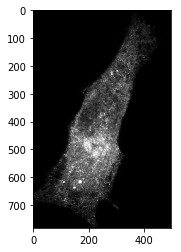

In [4]:
with tiff.TiffFile("data/test_gpi2.tif") as tif:
        images = tif.asarray()
        
plt.imshow(images[0], cmap="gray")